In [1]:
from transmission_line_simulator_new import *
import scipy.constants
# import sympy
# sympy.init_printing()
import  scipy.optimize as opt
import numpy as np

# import sys
# sys.path.append("/home/alena/Science_Python/Conformal_mapping_master") #my path to scripts

# from Conformal_mapping_of_a_coupler import *

## Resonator, feedline, claw

In [2]:
claw = capacitor()
qubit_cap = capacitor()
qubit_inductor = inductor()
#L = inductor()
source = port()
#source_feedline = transmission_line()
analyzer_feedline = transmission_line_coupler(n=1)
analyzer = port()

GND = short()
resonator_short_end = transmission_line_coupler(n=1)
resonator_claw_end = transmission_line_coupler(n=1)#
coupler = transmission_line_coupler()
res = resistor()

circuit = transmission_line_system()
circuit.add_element(coupler, [1, 2, 3, 4])
circuit.add_element(source, [1])
# circuit.add_element(analyzer_feedline, [3, 8])
circuit.add_element(analyzer, [3])
circuit.add_element(resonator_short_end, [4, 0])
#circuit.add_element(res, [7, 0])
circuit.add_element(resonator_claw_end, [2, 6])
circuit.add_element(claw, [6, 7])
circuit.add_element(qubit_cap, [7, 0])
circuit.add_element(qubit_inductor, [7, 0])
circuit.add_element(GND, [0])

In [3]:
source.Z0=50
analyzer.Z0=50

coupler.l=0.4e-3
coupler.Ll=np.asarray([[473.815e-9,175.09e-9],[175e-9,556.2e-9]])
coupler.Cl=np.asarray([[164.76e-12,-51.866e-12],[-51.866e-12,140.355e-12]])
coupler.Rl=np.zeros(coupler.Ll.shape, dtype=np.int)
coupler.Gl=np.zeros(coupler.Ll.shape, dtype=np.int)

# analyzer_feedline.l=



resonator_short_end.l = 3.6e-3
resonator_short_end.Cl = 140.453e-12
resonator_short_end.Ll = 491.157e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1e-3
resonator_claw_end.Cl = 140.453e-12
resonator_claw_end.Ll = 491.157e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

claw.C=10e-15
qubit_cap.C=70e-15
qubit_inductor.L=19e-9

In [4]:
1/np.sqrt((qubit_cap.C+claw.C)*qubit_inductor.L)/1e9/2/np.pi

4.082238155990731

In [5]:
num=3000
x = np.linspace(3.e9+0j, 8e9+0j, num)
y = np.zeros(num, dtype=complex)

In [7]:
for i in range(num):
    #y[i] = np.linalg.det(circuit.create_boundary_problem_matrix(x[i])) 
    y[i] = circuit.boundary_condition_matrix_abs_det(x[i]*2*np.pi)

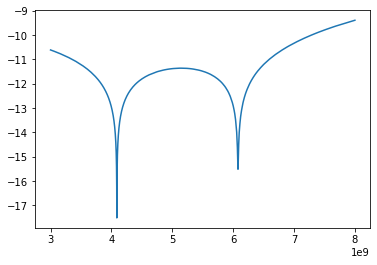

In [8]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(x.real, y.real)
# plt.xlim(3e9,5e9)
# plt.ylim(0,10e-37)
# plt.scatter(omega_0, 0, color = 'red')
# plt.scatter(omega_teor, 0, color = 'green')
# plt.plot(x.real, np.zeros(100))
plt.show()

In [10]:
# func_to_fit = lambda x:circuit.create_boundary_problem_matrix(x[0]+1j*x[1])[0]
# func_to_find = lambda x:circuit.create_boundary_problem_matrix(x)[1]
# guess_values = [(6*2*np.pi*1e9,0)]
# results=[]
# for x,y in guess_values:
#     results.append(opt.fmin(func_to_fit,(x,y)))

In [22]:
func_to_find(res[0]*2*np.pi*1e9+1j*res[1]*2*np.pi*1e9)

(1.7119843336229795e-09+1.391679292525154e-08j)

In [17]:
for res in results:
    print(res)

[ 6.01171875e+00 -4.88281250e-06]


In [19]:
res[0]*1e9,res[1]*1e6

(6011718750.0, -4.882812500000004)

In [4]:
# %%time
boundary_problem_claw_resonator = circuit.create_boundary_problem_matrix(6e9*2*np.pi)
boundary_problem_claw_resonator

array([[ 1.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  2.15390591e+01+0.00000000e+00j,
        -2.15390591e+01+0.00000000e+00j, -1.61895867e+00+0.00000000e+00j,
         1.61895867e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00

In [20]:
%%time
res=opt.fmin(circuit.create_boundary_problem_matrix,6e9*2*np.pi)
res/2/np.pi/1e9

ValueError: setting an array element with a sequence.

In [21]:
results=opt.minimize(circuit.create_boundary_problem_matrix,6.1e9*2*np.pi, method='Nelder-Mead')
# res/2/np.pi/1e9

In [22]:
results.x/2/np.pi

array([5.99753906e+09])

In [13]:
3.7553539e+10/1e9/2/np.pi

## S21

In [14]:
num=5000
x = np.linspace(4e9+0j, 6.5e9+0j, num)
y = np.zeros(num, dtype=complex)

In [20]:
mat=circuit.create_boundary_problem_matrix(x[0]*2*np.pi)
mat.shape

(34, 34)

In [21]:
zeros=np.zeros((mat.shape[0],1))
zeros[0]=1
for i in range(num):
    mat=circuit.create_boundary_problem_matrix(x[i]*2*np.pi)
    s21= np.linalg.solve(mat, zeros)
    y[i]=s21[1]

C:\Users\Ivan\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


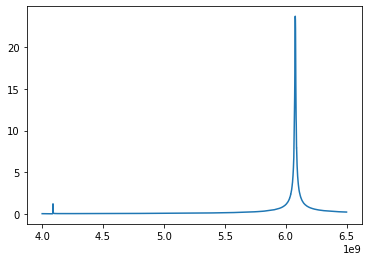

In [22]:
plt.plot(x,np.abs(y))
# plt.xlim(3.75e9,4.25e9)

In [24]:
x[np.argmax(y)]

(4085028342.7809267+0j)

In [13]:
zeros=np.zeros((mat.shape[0],1))

In [14]:
zeros[0]=1

In [16]:
x = np.linalg.solve(mat, zeros)

In [17]:
x

array([[ 1.11022302e-16+0.j        ],
       [-9.99883198e-01+0.01080686j],
       [ 1.46760244e-01-0.0015862j ],
       [-2.33603725e-06-0.00021614j],
       [ 2.33603725e-06+0.00021614j],
       [-2.33603725e-06-0.00021614j],
       [ 2.33603725e-06+0.00021614j],
       [ 2.09294510e-06+0.00019365j],
       [-2.09294510e-06-0.00019365j],
       [-4.42898234e-06-0.00040978j],
       [ 4.42898234e-06+0.00040978j],
       [ 0.00000000e+00+0.j        ]])

## Qubit+port

In [2]:
claw = capacitor()
qubit_cap = capacitor()
qubit_inductor = inductor()
#L = inductor()
source = port()
GND = short()
res=resistor()
circuit = transmission_line_system()
# circuit.add_element(source, [1])

circuit.add_element(res, [0, 1])
circuit.add_element(claw, [1, 2])
circuit.add_element(qubit_cap, [2, 0])
circuit.add_element(qubit_inductor, [2, 0])
circuit.add_element(GND, [0])

In [3]:
# source.Z0=50
res.R=50

claw.C=10e-15
qubit_cap.C=70e-15
qubit_inductor.L=19e-9

In [4]:
num=3000
x = np.linspace(3e9+0j, 5e9+0j, num)
y = np.zeros(num, dtype=complex)

In [5]:
for i in range(num):
    #y[i] = np.linalg.det(circuit.create_boundary_problem_matrix(x[i])) 
#     y[i] = circuit.create_boundary_problem_matrix(x[i]*2*np.pi)[0]
    y[i] = circuit.boundary_condition_matrix_abs_det(x[i]*2*np.pi)

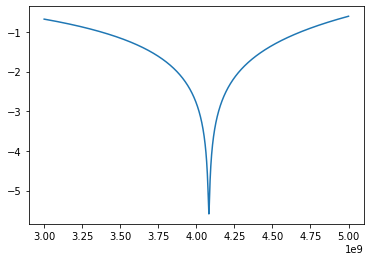

In [6]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(x.real, y.real)
# plt.xlim(4e9,5e9)
# plt.ylim(0,10e-37)
# plt.scatter(omega_0, 0, color = 'red')
# plt.scatter(omega_teor, 0, color = 'green')
# plt.plot(x.real, np.zeros(100))
plt.show()

In [7]:
x[np.argmin(y)]

(4082360786.928976+0j)

## Feedline, Purcell filter, resonator

In [17]:
resonator_claw_ground = capacitor()
resonator_claw_qubit = capacitor()
GND = short()
GND1 = short()
GND2 = short()
GND3 = short()
GND4 = short()
GND5 = short()

feedline_cap = capacitor()
purcell_cap = capacitor()
qubit_cap = capacitor()
qubit_inductor = inductor()
#L = inductor()
source = port()
#source_feedline = transmission_line()
analyzer_feedline = transmission_line_coupler(n=1)
# analyzer = port()


resonator_short_end = transmission_line_coupler(n=1)
resonator_claw_end = transmission_line_coupler(n=1)#
feedline_coupler = transmission_line_coupler()
purcell_coupler = transmission_line_coupler()
purcell_short_end_before_coupler = transmission_line_coupler(n=1)
purcell_claw_end = transmission_line_coupler(n=1)#

circuit = transmission_line_system()
circuit.add_element(source, [1])
circuit.add_element(feedline_coupler, [1, 2, 3, 4])
circuit.add_element(analyzer_feedline, [3, 5])
circuit.add_element(feedline_cap, [5, 12])

circuit.add_element(purcell_claw_end, [2, 6])
circuit.add_element(purcell_cap, [6, 13])
circuit.add_element(purcell_short_end_before_coupler, [4, 7])
circuit.add_element(purcell_coupler, [7, 8,14,15])
# circuit.add_element(GND, [9])
# circuit.add_element(GND, [10])
circuit.add_element(resonator_short_end, [8,9])

circuit.add_element(resonator_claw_end, [9,10])
circuit.add_element(resonator_claw_ground, [10,16])
circuit.add_element(resonator_claw_qubit, [10,11])
circuit.add_element(qubit_cap, [11, 0])
circuit.add_element(qubit_inductor, [11, 0])
circuit.add_element(GND, [0])
circuit.add_element(GND1, [12])
circuit.add_element(GND2, [13])
circuit.add_element(GND3, [14])
circuit.add_element(GND4, [15])
circuit.add_element(GND5, [16])

In [18]:
source.Z0=50

feedline_coupler.l=0.4e-3
feedline_coupler.Ll=np.asarray([[473.815e-9,175.09e-9],[175e-9,556.2e-9]])
feedline_coupler.Cl=np.asarray([[164.76e-12,-51.866e-12],[-51.866e-12,140.355e-12]])
feedline_coupler.Rl=np.zeros(feedline_coupler.Ll.shape, dtype=np.int)
feedline_coupler.Gl=np.zeros(feedline_coupler.Ll.shape, dtype=np.int)

analyzer_feedline.l = 1e-3
analyzer_feedline.Cl = 176.494e-12
analyzer_feedline.Ll = 401.892e-9
analyzer_feedline.Rl = 0
analyzer_feedline.Gl = 0

feedline_cap.C=10e-15

purcell_claw_end.l = 1e-3
purcell_claw_end.Cl = 176.494e-12
purcell_claw_end.Ll = 401.892e-9
purcell_claw_end.Rl = 0
purcell_claw_end.Gl = 0

purcell_cap.C=10e-15

purcell_short_end_before_coupler.l = 3.6e-3
purcell_short_end_before_coupler.Cl = 176.494e-12
purcell_short_end_before_coupler.Ll = 401.892e-9
purcell_short_end_before_coupler.Rl = 0
purcell_short_end_before_coupler.Gl = 0

purcell_coupler.l=20e-6
purcell_coupler.Ll=np.asarray([[473.815e-9,175.09e-9],[175e-9,556.2e-9]])
purcell_coupler.Cl=np.asarray([[164.76e-12,-51.866e-12],[-51.866e-12,140.355e-12]])
purcell_coupler.Rl=np.zeros(purcell_coupler.Ll.shape, dtype=np.int)
purcell_coupler.Gl=np.zeros(purcell_coupler.Ll.shape, dtype=np.int)


resonator_short_end.l = 4e-3
resonator_short_end.Cl = 176.494e-12
resonator_short_end.Ll = 401.892e-9
resonator_short_end.Rl = 0
resonator_short_end.Gl = 0

resonator_claw_end.l = 1e-3
resonator_claw_end.Cl = 176.494e-12
resonator_claw_end.Ll = 401.892e-9
resonator_claw_end.Rl = 0
resonator_claw_end.Gl = 0

resonator_claw_ground.C=10e-15
resonator_claw_qubit.C=10e-15
qubit_cap.C=70e-15
qubit_inductor.L=19e-9

In [19]:
1/np.sqrt((qubit_cap.C+resonator_claw_qubit.C)*qubit_inductor.L)/1e9/2/np.pi

4.082238155990731

In [5]:
%%time
boundary_problem_claw_resonator = circuit.create_boundary_problem_matrix(6e9*2*np.pi)[0]
boundary_problem_claw_resonator

Wall time: 35.5 ms


array([ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, 50.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
        0.+0.j,  0.+0.j,  0.+0.j])

In [20]:
num=3000
x = np.linspace(3.e9+0j, 7e9+0j, num)
y = np.zeros(num, dtype=complex)

In [22]:
for i in range(num):
#     y[i] = np.linalg.det(circuit.create_boundary_problem_matrix(x[i])) 
    y[i] = circuit.create_boundary_problem_matrix(x[i]*2*np.pi)[0]

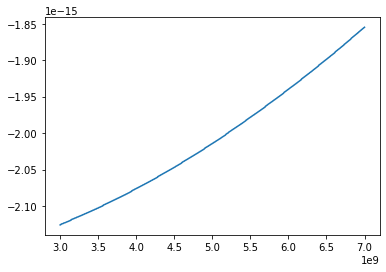

In [23]:
import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(x.real, y.real)
# plt.xlim(4.2e9,4.6e9)
# plt.ylim(0,10e-37)
# plt.scatter(omega_0, 0, color = 'red')
# plt.scatter(omega_teor, 0, color = 'green')
# plt.plot(x.real, np.zeros(100))
plt.show()

In [12]:
func_to_fit = lambda x:circuit.create_boundary_problem_matrix(x[0]*2*np.pi*1e9+1j*x[1])[0]
func_to_find = lambda x:circuit.create_boundary_problem_matrix(x)[1]
guess_values = [(4,0)]
results=[]
for x,y in guess_values:
    results.append(opt.fmin(func_to_fit,(x,y),maxiter=10000))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Ivan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-57cdf6860c71>", line 6, in <module>
    results.append(opt.fmin(func_to_fit,(x,y),maxiter=10000))
  File "C:\Users\Ivan\Anaconda3\lib\site-packages\scipy\optimize\optimize.py", line 416, in fmin
    res = _minimize_neldermead(func, x0, args, callback=callback, **opts)
  File "C:\Users\Ivan\Anaconda3\lib\site-packages\scipy\optimize\optimize.py", line 617, in _minimize_neldermead
    fsim[j] = func(sim[j])
  File "C:\Users\Ivan\Anaconda3\lib\site-packages\scipy\optimize\optimize.py", line 300, in function_wrapper
    return function(*(wrapper_args + args))
  File "<ipython-input-12-57cdf6860c71>", line 1, in <lambda>
    func_to_fit = lambda x:circuit.create_boundary_problem_matrix(x[0]*2*np.pi*1e9+1j*x[1])[0]
  File "C:\Users\Ivan\Documents\notebooks\Transmission lin

KeyboardInterrupt: 

In [22]:
for res in results:
    print(res)

[4.71364143e+00 2.37980466e-04]


In [26]:
res[1]*1e3*2*np.pi

-5.753961935359039

In [80]:
omegas=[func_to_find(i) for i in results]

In [85]:
np.real(omegas[0]),np.imag(omegas[0])

(1.2228235318064721e-21, 9.529328945107192e-22)

In [11]:
results=opt.minimize(circuit.create_boundary_problem_matrix,6e9*2*np.pi, method="Nelder-Mead")

In [12]:
results.x/2/np.pi

array([5.83640796e+09])